# Import libraries

In [1]:
from pathlib import Path

import pandas as pd
from tqdm import tqdm

from deeplcms_functions import convert_lcms_files, inspect_database, utils

# Testing

In [2]:
example_file = utils.Configuration.RAW_DATA_PATH.joinpath(
    "ST002432_IIV_Metformin/YW_20201206_047.mzML"
)

In [3]:
convert_lcms_files.plot_2D_spectra_overview(example_file, save=False)

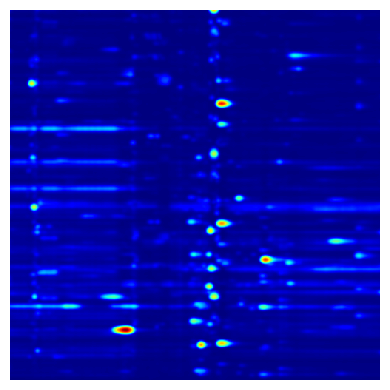

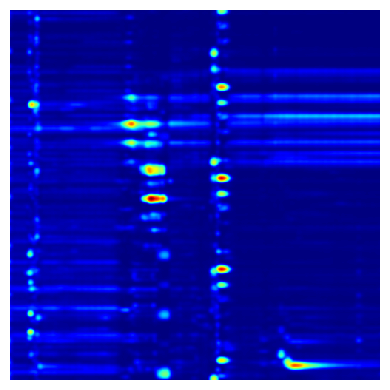

In [4]:
convert_lcms_files.plot_2D_spectra_slices(
    example_file, save=False, show=True, num_slices=2
)

# Step 1

In [5]:
convert_lcms_files.create_train_val_test_directories(
    study_name="experiment",
    path=utils.Configuration.RAW_DATA_PATH,
    group_1="Placebo",
    group_2="Metformin",
)

C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\train\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\train\Metformin
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\val\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\val\Metformin
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\test\Placebo
C:\Users\s0212777\OneDrive - Universiteit Antwerpen\Jupyter_projects\Articles\DeepLCMS\data\raw\experiment\test\Metformin


# Step 2

In [6]:
file_path = utils.Configuration.RAW_DATA_PATH.joinpath("sample_list.parquet.gzip")

# pd.read_parquet(file_path)
train_test_val_split_df = convert_lcms_files.get_train_val_test_split(
    path=file_path, test_portion=0.1, val_portion=0.2
)
train_test_val_split_df

,mb_sample_id,sample_name,visit,treatment,split
0,SA243004,YW_20201206_071,V1,Metformin,train
1,SA243001,YW_20201206_072,V1,Metformin,test
2,SA243002,YW_20201206_089,V1,Metformin,train
3,SA243010,YW_20201206_090,V1,Metformin,train
4,SA242999,YW_20201206_101,V1,Metformin,train
...,...,...,...,...,...
355,SA243335,YW_20201210_186,V6,Placebo,val
356,SA243340,YW_20201210_233,V6,Placebo,train
357,SA243345,YW_20201210_234,V6,Placebo,val
358,SA243343,YW_20201210_255,V6,Placebo,train


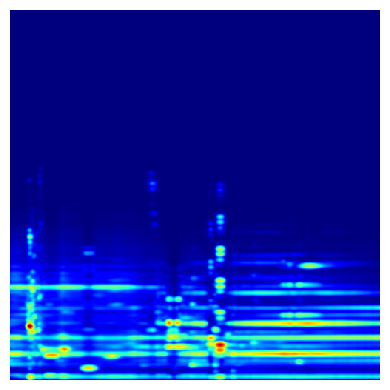

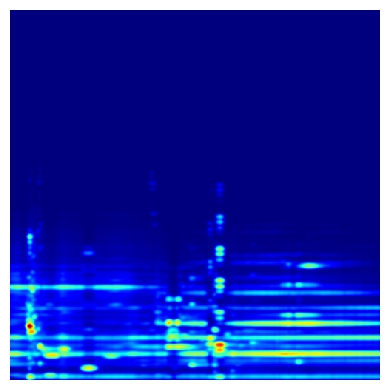

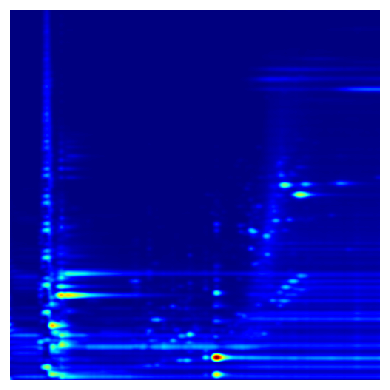

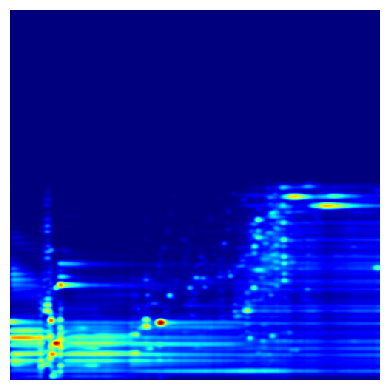

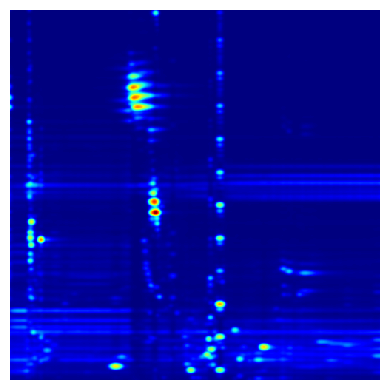

In [7]:
data_folder = utils.Configuration.RAW_DATA_PATH.joinpath("ST002432_IIV_Metformin")


for file_ in train_test_val_split_df.query(
    "visit == 'V2' and treatment == 'Placebo'"
).sample_name.sample(5):
    file = Path(f"{data_folder.joinpath(file_)}.mzML")
    convert_lcms_files.plot_2D_spectra_overview(file, save=False, show=True)

# Step 3

In [8]:
convert_lcms_files.convert_LCMS_files_and_move_images(
    source_folder=utils.Configuration.RAW_DATA_PATH.joinpath("ST002432_IIV_Metformin"),
    df=train_test_val_split_df,
    destination_folder=utils.Configuration.RAW_DATA_PATH.joinpath("experiment"),
    target_col="treatment",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.28it/s]
